<a href="https://colab.research.google.com/github/philipobrien/colab-notebooks/blob/master/Basic_Heart_rate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q torch

In [0]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
!wget https://physionet.org/physiobank/database/bidmc/bidmc_csv/bidmc_01_Numerics.csv

--2019-07-22 15:44:32--  https://physionet.org/physiobank/database/bidmc/bidmc_csv/bidmc_01_Numerics.csv
Resolving physionet.org (physionet.org)... 128.30.30.88
Connecting to physionet.org (physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7644 (7.5K)
Saving to: ‘bidmc_01_Numerics.csv’

bidmc_01_Numerics.c 100%[===================>]   7.46K  --.-KB/s    in 0s      

2019-07-22 15:44:33 (526 MB/s) - ‘bidmc_01_Numerics.csv’ saved [7644/7644]



In [0]:
df = pd.read_csv('bidmc_01_Numerics.csv')

In [0]:
df.head()

,Time [s],HR,PULSE,RESP,SpO2
0,0,94,93.0,25,97.0
1,1,94,93.0,25,97.0
2,2,94,93.0,25,97.0
3,3,92,93.0,26,97.0
4,4,93,93.0,26,97.0


In [0]:
df.columns = df.columns.str.replace(' ', '')
df = df.fillna(method='ffill')
df = df.rename({'Time[s]':'time'}, axis='columns')

In [0]:
df['anomaly'] = df.apply (lambda row: 0 if row.HR <= 91 else 1, axis=1)

In [0]:
df.head(n=5)

,time,HR,PULSE,RESP,SpO2,anomaly
0,0,94,93.0,25,97.0,1
1,1,94,93.0,25,97.0,1
2,2,94,93.0,25,97.0,1
3,3,92,93.0,26,97.0,1
4,4,93,93.0,26,97.0,1


In [0]:
df = df[['HR', 'anomaly']]

In [0]:
x_data = torch.FloatTensor(df['HR'])
y_data = torch.FloatTensor(df['anomaly'])
x_data = x_data.reshape(481, 1)
y_data = y_data.reshape(481, 1)

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [0]:
torch.manual_seed(2)
model = Model(1, 4, 1)

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
epochs = 10000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print(f"epoch: {i}, loss: {loss.item()}")
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 0.7089826464653015
epoch: 1, loss: 0.7082775235176086
epoch: 2, loss: 0.707573652267456
epoch: 3, loss: 0.70686936378479
epoch: 4, loss: 0.7061721086502075
epoch: 5, loss: 0.7054773569107056
epoch: 6, loss: 0.7047820091247559
epoch: 7, loss: 0.7040934562683105
epoch: 8, loss: 0.7034000754356384
epoch: 9, loss: 0.7027192115783691
epoch: 10, loss: 0.7020390629768372
epoch: 11, loss: 0.7013596892356873
epoch: 12, loss: 0.7006809115409851
epoch: 13, loss: 0.7000042200088501
epoch: 14, loss: 0.699338436126709
epoch: 15, loss: 0.6986671090126038
epoch: 16, loss: 0.6980043053627014
epoch: 17, loss: 0.6973403096199036
epoch: 18, loss: 0.696678638458252
epoch: 19, loss: 0.6960229277610779
epoch: 20, loss: 0.6953685283660889
epoch: 21, loss: 0.6947184801101685
epoch: 22, loss: 0.6940723657608032
epoch: 23, loss: 0.6934245824813843
epoch: 24, loss: 0.6927852034568787
epoch: 25, loss: 0.6921442747116089
epoch: 26, loss: 0.6915104985237122
epoch: 27, loss: 0.6908775568008423
epoch: 

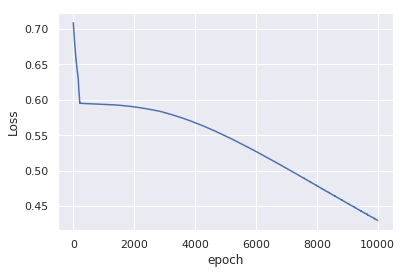

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
point = torch.tensor([100.])
model.predict(point)

1

In [0]:
point = torch.tensor([50.])
model.predict(point)

0